<a href="https://colab.research.google.com/github/michaelnaderi/Google_Earth_Engine/blob/main/Standardized_Precipitation_Index(SPI)_PERSIANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
import xarray as xr

In [2]:
!pip install xee
import xee


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00


In [3]:
ee.Authenticate()
ee.Initialize(project = 'ee-mohammadmehdinaderii', opt_url = 'https://earthengine-highvolume.googleapis.com')

In [4]:
time_start = ee.Date('2000')
time_end = ee.Date('2024')
time_dif = time_end.difference(time_start, 'month').round()
time_list = ee.List.sequence(0, ee.Number(time_dif).subtract(1),1).map(lambda x: time_start.advance(x, 'month'))

In [5]:
col = ee.ImageCollection("NOAA/PERSIANN-CDR").filterDate(time_start, time_end)

In [6]:
def monthly(date):
  start_date = ee.Date(date)
  end_date = start_date.advance(1, 'month')
  img = col.filterDate(start_date, end_date).sum()
  return img.set('system:time_start', start_date.millis())


In [9]:
monthly_col = ee.ImageCollection(time_list.map(monthly))
loc = [-100.24291787426384, 31.5539629340931, -92.64037881176384, 36.85654825454354]
ds = xr.open_dataset(monthly_col, engine = 'ee', crs = 'EPSG:4326', scale = 0.27, geometry = loc)


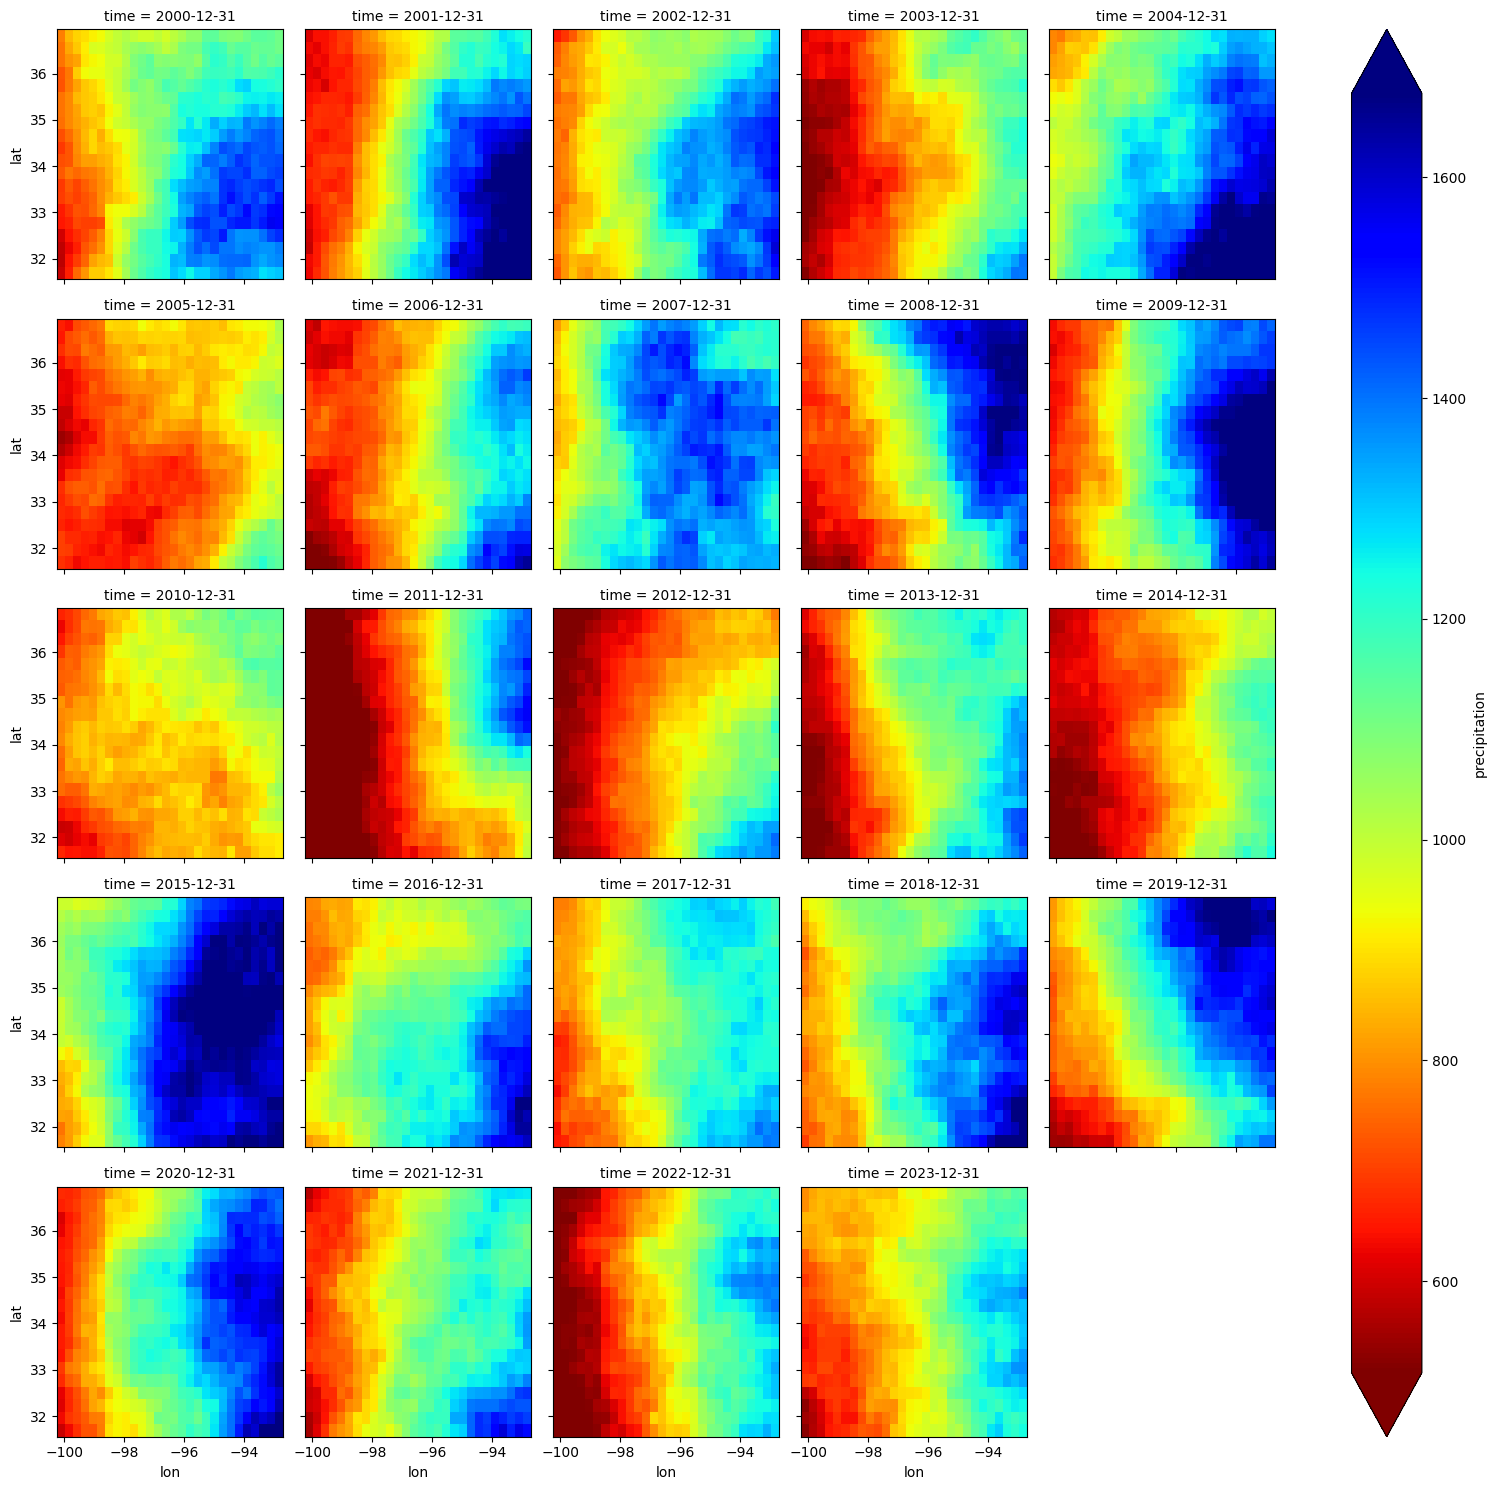

In [10]:
ds

annual = ds.resample(time = 'YE').sum('time')

annual

import matplotlib.pyplot as plt

annual.precipitation.plot(x = 'lon', y = 'lat', cmap = 'jet_r', col = 'time', robust = True, col_wrap = 5)

In [11]:
point = ds.sel(lon = -92.64037881176384, lat = 31.5539629340931, method = 'nearest')

point

point.time.values

array(['2000-01-01T00:00:00.000000000', '2000-02-01T00:00:00.000000000',
       '2000-03-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-06-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2000-08-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2000-10-01T00:00:00.000000000',
       '2000-11-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', '2001-04-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2001-07-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-02-01T00:00:00.000000000',
       '2002-03-01T00:00:00.000000000', '2002-04-01

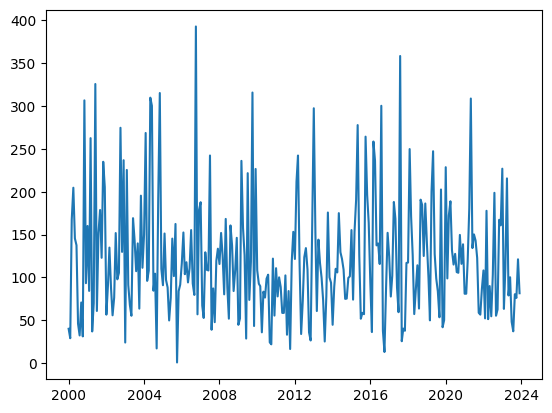

In [12]:
point.precipitation.values

plt.plot(point.time, point.precipitation)

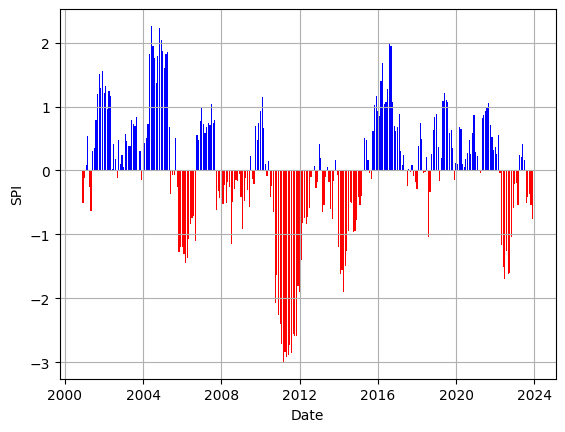

In [30]:
spi_fun = spi.SPI()

spi12months = spi_fun.calculate(df, 'date', 'pr', freq = 'M', scale = 12, fit_type ='lmom', dist_type = 'gam')

spi12months.to_csv('spi_12month.csv')

spi12months

from standard_precip.utils import plot_index

fig = plot_index(spi12months, 'date', 'pr_scale_12_calculated_index')